In [1]:
using Plots, LaTeXStrings
using Plots.PlotMeasures
empty!(ARGS)
push!(ARGS, "G:/Hamburg/b20.0_mu0.4/lDGAConfig.toml")
include(joinpath(@__DIR__,"../examples/example00_lDGA.jl"))

using LaTeXStrings

  Activating project at `G:\Codes\LadderDGA.jl`
[ Info: Precompiling LadderDGA [78e40beb-bf89-4c0e-9d2b-bee278912f2b] (cache misses: include_dependency fsize change (18))


[ Info: Reading Inputs...
[ Info: Setting up calculation for kGrid 2Dsc-0.25-0.05-0.025 of size 4


DBG: NOT using diagonal terms in λ₀


┌ Info: Inputs Read. Starting Computation.
│     Local susceptibilities with ranges are:
│     χLoc_m(1:301) = 0.3838, χLoc_d(1:301) = 0.1017
│     sum χupup check (plain ?≈? tail sub ?≈? imp_dens ?≈? n/2 (1-n/2)): 0.2401531297823682 ?=? 0.2427835212727256 ?≈? 0.2427835212727254 ≟ 0.24275850716113093"
│ Local EoM check for the first 5 frequencies: 0.0033, 0.0033, 0.0033, 0.0033, 0.0033  
└     
[ Info: m channel: |∑χ(q=0,ω≠0)| = 0.424170832895 ≟ 0
[ Info: d channel: |∑χ(q=0,ω≠0)| = 0.340341090156 ≟ 0


DBG: NOT using diagonal terms in λ₀


In [2]:
mP = lDGAhelper.mP
kG = lDGAhelper.kG
U = mP.U
nden = mP.n
beta = mP.β
lim_se = U^2 * (nden/2) * (1 - nden/2)
se_tmp = calc_Σ(χm, γm, χd, γd, λ₀, lDGAhelper);

xr = collect(axes(se_tmp,2))
iν_arr = LadderDGA.iν_array(beta, xr)
gimp = lDGAhelper.gImp[1,xr];

# EPot Condition

In [116]:
λd_min_sample = -3.0# -4.42876699766992 #LadderDGA.LambdaCorrection.get_λ_min(χd)
λd_max = 10.0
Nit = 40
xr_dm_01, fr_dm_01 = LadderDGA.LambdaCorrection.EPotCond_curve(χm,γm,χd,γd,λ₀, lDGAhelper; maxit=Nit, λmin=λd_min_sample, λmax=λd_max, tc=ΣTail_Plain)
xr_dm_02, fr_dm_02 = LadderDGA.LambdaCorrection.EPotCond_curve(χm,γm,χd,γd,λ₀, lDGAhelper; maxit=Nit, λmin=λd_min_sample, λmax=λd_max, tc=ΣTail_Full)
xr_dm_03, fr_dm_03 = LadderDGA.LambdaCorrection.EPotCond_curve(χm,γm,χd,γd,λ₀, lDGAhelper;maxit=Nit, λmin=λd_min_sample, tc=ΣTail_ExpStep{0.01}, λmax=λd_max);
xr_dm_04, fr_dm_04 = LadderDGA.LambdaCorrection.EPotCond_curve(χm,γm,χd,γd,λ₀, lDGAhelper;maxit=Nit, λmin=λd_min_sample, tc=ΣTail_ExpStep{0.1}, λmax=λd_max);
#xr_dm_05, fr_dm_05 = LadderDGA.LambdaCorrection.EPotCond_curve(χm,γm,χd,γd,λ₀, lDGAhelper;maxit=40, λmin=λd_min_sample, tc=ΣTail_ExpStep{0.15}, λmax=λd_max);
xr_dm_06, fr_dm_06 = LadderDGA.LambdaCorrection.EPotCond_curve(χm,γm,χd,γd,λ₀, lDGAhelper;maxit=40, λmin=λd_min_sample, tc=ΣTail_ExpStep{0.5}, λmax=λd_max);
xr_dm_07, fr_dm_07 = LadderDGA.LambdaCorrection.EPotCond_curve(χm,γm,χd,γd,λ₀, lDGAhelper;maxit=Nit, λmin=λd_min_sample, tc=ΣTail_ExpStep{1.0}, λmax=λd_max);
xr_dm_08, fr_dm_08 = LadderDGA.LambdaCorrection.EPotCond_curve(χm,γm,χd,γd,λ₀, lDGAhelper; maxit=Nit, λmin=λd_min_sample, λmax=λd_max, tc=ΣTail_EoM);

┌ Warning: improved (true) μ determination failed with Roots.ConvergenceFailed("Algorithm failed to converge")
└ @ LadderDGA G:\Codes\LadderDGA.jl\src\GFTools.jl:306
┌ Warning: improved (true) μ determination failed with Roots.ConvergenceFailed("Algorithm failed to converge")
└ @ LadderDGA G:\Codes\LadderDGA.jl\src\GFTools.jl:306
┌ Warning: improved (true) μ determination failed with Roots.ConvergenceFailed("Algorithm failed to converge")
└ @ LadderDGA G:\Codes\LadderDGA.jl\src\GFTools.jl:306
┌ Warning: improved (true) μ determination failed with Roots.ConvergenceFailed("Algorithm failed to converge")
└ @ LadderDGA G:\Codes\LadderDGA.jl\src\GFTools.jl:306
┌ Warning: improved (true) μ determination failed with Roots.ConvergenceFailed("Algorithm failed to converge")
└ @ LadderDGA G:\Codes\LadderDGA.jl\src\GFTools.jl:306
┌ Warning: improved (true) μ determination failed with Roots.ConvergenceFailed("Algorithm failed to converge")
└ @ LadderDGA G:\Codes\LadderDGA.jl\src\GFTools.jl:306
┌ Wa

In [117]:
se_full_list = []
EP1_full_list = []
EP2_list = []
se_eom_list = []
EP1_eom_list = []
se_plain_list = []
EP1_plain_list = []
se_delta_list = []
EP1_delta_list = []
for λd in xr_dm_01  
    rhs,PP_p1 = LadderDGA.LambdaCorrection.λm_rhs(χm, χd, lDGAhelper, λd=λd)
    λm  = LadderDGA.LambdaCorrection.λm_correction_val(χm, rhs, lDGAhelper)
    μ_new, G_ladder, se_tmp = calc_G_Σ(χm, γm, χd, γd, λ₀, λm, λd, lDGAhelper; tc=ΣTail_Full, fix_n = true)
    Ekin_1, Epot_1 = calc_E(G_ladder, se_tmp, μ_new, lDGAhelper.kG, lDGAhelper.mP)
    Epot_2 = EPot_p2(χm, χd, λm, λd, lDGAhelper.mP.n, lDGAhelper.mP.U, lDGAhelper.kG)
    push!(se_full_list,se_tmp)
    push!(EP1_full_list,Epot_1)
    push!(EP2_list,Epot_2)
    μ_new, G_ladder, se_tmp = calc_G_Σ(χm, γm, χd, γd, λ₀, λm, λd, lDGAhelper; tc=ΣTail_Plain, fix_n = true)
    Ekin_1, Epot_1 = calc_E(G_ladder, se_tmp, μ_new, lDGAhelper.kG, lDGAhelper.mP)
    push!(se_plain_list,se_tmp)
    push!(EP1_eom_list,Epot_1)
    μ_new, G_ladder, se_tmp = calc_G_Σ(χm, γm, χd, γd, λ₀, λm, λd, lDGAhelper; tc=ΣTail_EoM, fix_n = true)
    Ekin_1, Epot_1 = calc_E(G_ladder, se_tmp, μ_new, lDGAhelper.kG, lDGAhelper.mP)
    push!(se_eom_list,se_tmp)
    push!(EP1_plain_list,Epot_1)
    μ_new, G_ladder, se_tmp = calc_G_Σ(χm, γm, χd, γd, λ₀, λm, λd, lDGAhelper; tc=ΣTail_ExpStep{0.5}, fix_n = true)
    Ekin_1, Epot_1 = calc_E(G_ladder, se_tmp, μ_new, lDGAhelper.kG, lDGAhelper.mP)
    push!(se_delta_list,se_tmp)
    push!(EP1_delta_list,Epot_1)
end

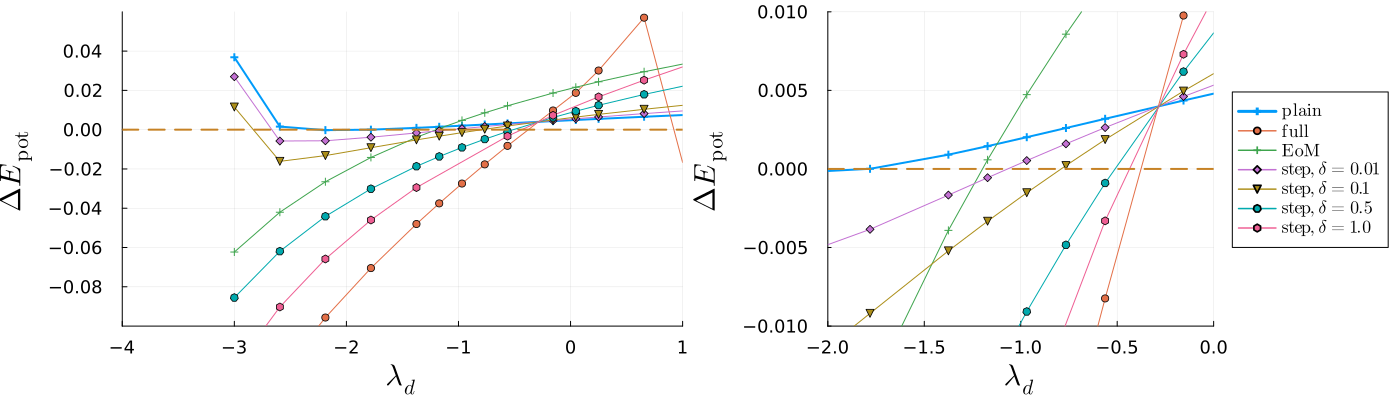

In [118]:
p1 = plot(xr_dm_01, fr_dm_01, size=(800,500), linewidth=2, ylims=(-.1,.06), xlims=(-4,1), legend=nothing, ylabel=L"\Delta E_\mathrm{pot}", xlabel=L"\lambda_d", label=L"\mathrm{plain}",
    xtickfontsize=12,ytickfontsize=12,xguidefontsize=20,yguidefontsize=20,legendfontsize=12, markershape=:auto, left_margin = 10mm, bottom_margin=10mm)
plot!(p1, xr_dm_02, fr_dm_02, label=L"\mathrm{full}", markershape=:auto)
plot!(p1, xr_dm_08, fr_dm_08, label=L"\mathrm{EoM}", markershape=:auto)
plot!(p1, xr_dm_03, fr_dm_03, label=L"\mathrm{step}, \delta=0.01", markershape=:auto)
plot!(p1, xr_dm_04, fr_dm_04, label=L"\mathrm{step}, \delta=0.1", markershape=:auto)
plot!(p1, xr_dm_06, fr_dm_06, label=L"\mathrm{step}, \delta=0.5", markershape=:auto)
plot!(p1, xr_dm_07, fr_dm_07, label=L"\mathrm{step}, \delta=1.0", markershape=:auto)
hline!([0.0], label=nothing, ls=:dash, lw=2)

p2 = plot(xr_dm_01, fr_dm_01, size=(800,500), linewidth=2, ylims=(-.01,.01), xlims=(-2,0), legend=:outerright, ylabel=L"\Delta E_\mathrm{pot}", xlabel=L"\lambda_d", label=L"\mathrm{plain}",
    xtickfontsize=12,ytickfontsize=12,xguidefontsize=20,yguidefontsize=20,legendfontsize=12, markershape=:auto, left_margin = 10mm, bottom_margin=10mm)
plot!(p2, xr_dm_02, fr_dm_02, label=L"\mathrm{full}", markershape=:auto)
plot!(p2, xr_dm_08, fr_dm_08, label=L"\mathrm{EoM}", markershape=:auto)
plot!(p2, xr_dm_03, fr_dm_03, label=L"\mathrm{step}, \delta=0.01", markershape=:auto)
plot!(p2, xr_dm_04, fr_dm_04, label=L"\mathrm{step}, \delta=0.1", markershape=:auto)
plot!(p2, xr_dm_06, fr_dm_06, label=L"\mathrm{step}, \delta=0.5", markershape=:auto)
plot!(p2, xr_dm_07, fr_dm_07, label=L"\mathrm{step}, \delta=1.0", markershape=:auto)
hline!([0.0], label=nothing, ls=:dash, lw=2)
p = plot(p1, p2, size=(1400,400), left_margin=8mm, bottom_margin=10mm)
savefig("delta_expstep_comparison_mu04.pdf")
display(p)

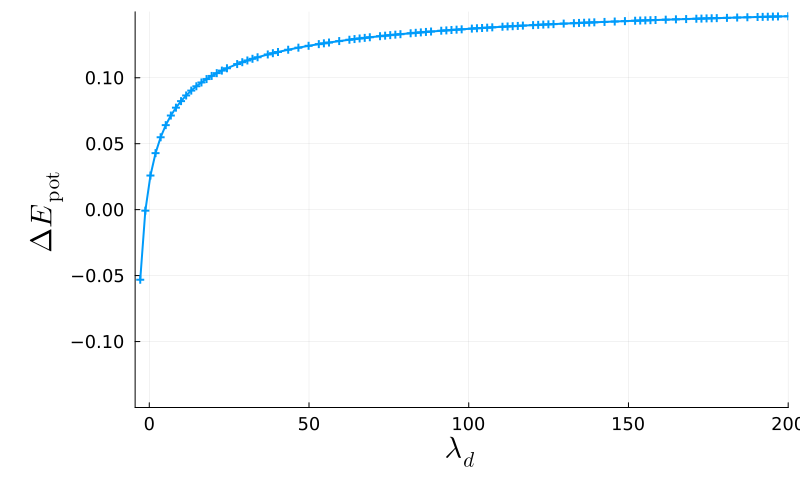

In [119]:
λd_min_sample = LadderDGA.LambdaCorrection.get_λ_min(χd)
λd_max = 200.0
Nit = 100
xr_dm_full, fr_dm_full = LadderDGA.LambdaCorrection.EPotCond_curve(χm,γm,χd,γd,λ₀, lDGAhelper; maxit=Nit, λmin=λd_min_sample, λmax=λd_max, tc=ΣTail_EoM);
plot(xr_dm_full, fr_dm_full,size=(800,500), linewidth=2, ylims=(-.15,.15), xlims=(λd_min_sample,λd_max), legend=nothing, ylabel=L"\Delta E_\mathrm{pot}", xlabel=L"\lambda_d", label=L"\mathrm{plain}",
    xtickfontsize=12,ytickfontsize=12,xguidefontsize=20,yguidefontsize=20,legendfontsize=12, markershape=:auto, left_margin = 10mm, bottom_margin=10mm)

In [3]:
include(joinpath(@__DIR__,"RootsTests.jl"))

λm_correction_val_MethodTest2 (generic function with 1 method)

In [4]:
#@timeit to "newtonRF" λdm_correction_val_testRF(χm,γm,χd, γd,λ₀, lDGAhelper; δλd=1e-1, eps = 1e-8)

@timeit to "newtonReset" λdm_correction_val_test(χm,γm,χd, γd,λ₀, lDGAhelper;  δλd=1e-1, fix_n = true, tc= ΣTail_EoM,  use_trivial_λmin = true,  λd_min = NaN,  validation_threshold = 1e-8, max_steps_m = 2000,  max_steps_dm = 2000)

@timeit to "newtonSecular" λdm_correction_val_testTF(χm,γm,χd, γd,λ₀, lDGAhelper;  δλd=1e-1, validation_threshold = 1e-8, max_steps_m = 2000,  max_steps_dm = 2000)

methodList = [("Bisection", Roots.Bisection()), ("A42", Roots.A42()), ("AlefeldPotraShi", Roots.AlefeldPotraShi()), ("Brent", Roots.Brent()), ("Chandrapatla", Roots.Chandrapatla()),
              ("Ridders", Roots.Ridders()), ("ITP", Roots.ITP()), ("FalsePosition", Roots.FalsePosition())]#,
               # ("LithBoonkkampIJzermanBracket",Roots.LithBoonkkampIJzermanBracket()),("BracketedHalley",Roots.BracketedHalley()),("BracketedChebyshev",Roots.BracketedChebyshev()),("BracketedSchroder",Roots.BracketedSchroder())] 
for el in methodList
    try
        @timeit to el[1] λdm_correction_val_MethodTest(el[2], χm,γm,χd, γd,λ₀, lDGAhelper; δλd=1e-1 , fix_n = true, tc= ΣTail_EoM,  use_trivial_λmin = true,  λd_min = NaN,  validation_threshold = 1e-8, max_steps_m = 2000,  max_steps_dm = 2000)
    catch e
        println("method $(el[1]) failed with $e")
    end
end


Method: Reset. Result = -0.02555640620657283 /// NF = 15
Method: Secular. Result = -0.02555596845991115 /// NF = 15
Method: Bisection(). Result = -0.025556079788342127 /// NF = 27
Method: A42(). Result = -0.025556406206726223 /// NF = 29
Method: AlefeldPotraShi(). Result = -0.025556406206729863 /// NF = 21
Method: Roots.Brent(). Result = -0.025556405405009624 /// NF = 15
Method: Roots.Chandrapatla(). Result = -0.025556406216210463 /// NF = 14
Method: Roots.Ridders(). Result = -0.025556406205603767 /// NF = 16
Method: Roots.ITP{Float64, Int64}(0.2, 2, 1). Result = -0.025556792213823537 /// NF = 14
Method: FalsePosition{:anderson_bjork}(). Result = -0.025556582197350457 /// NF = 6


In [5]:
get_λ_min(χm)

-0.20289916346743442

In [6]:
rhs,PP_p1 = LadderDGA.LambdaCorrection.λm_rhs(χm, χd, lDGAhelper, λd=.1)
ωn2_tail = ω2_tail(χm)
@timeit to "newtonReset" t = λm_correction_val_reset(χm, rhs, lDGAhelper.kG, ωn2_tail;  δλ=1e-1,eps = 1e-8, max_steps =100)
println(t)
@timeit to "newtonSecular" t = λm_correction_val_secular(χm, rhs, lDGAhelper.kG, ωn2_tail;  δλ=1e-1,eps = 1e-8)
println(t)
methodList = [("Bisection", Roots.Bisection()), ("A42", Roots.A42()), ("AlefeldPotraShi", Roots.AlefeldPotraShi()), ("Brent", Roots.Brent()), ("Chandrapatla", Roots.Chandrapatla()),
              ("Ridders", Roots.Ridders()), ("ITP", Roots.ITP()), ("FalsePosition", Roots.FalsePosition())]#,
               # ("LithBoonkkampIJzermanBracket",Roots.LithBoonkkampIJzermanBracket()),("BracketedHalley",Roots.BracketedHalley()),("BracketedChebyshev",Roots.BracketedChebyshev()),("BracketedSchroder",Roots.BracketedSchroder())] 
for el in methodList
    try
        @timeit to el[1] t = λm_correction_val_MethodTest(el[2],χm, rhs, lDGAhelper.kG, ωn2_tail;  δλ=1e-1,eps = 1e-8)
        println(t)
    catch e
        println("method $(el[1]) failed with $e")
    end
end


nsteps = 24
-0.04687202117342523
nsteps = 10
-0.046872018582670816
nsteps = 32
-0.04687203301216846
nsteps = 16
-0.046872021178296495
nsteps = 15
-0.04687202117829649
nsteps = 9
-0.0468720211783143
nsteps = 12
-0.04687202117790472
nsteps = 14
-0.04687202117881597
nsteps = 19
-0.04687202117997744
nsteps = 7
-0.04687201804688369


In [45]:
?min

search: min in sin @main Pkg.pin join sign bind eigmin pinv argmin Main sind



```
min(x, y, ...)
```

Return the minimum of the arguments, with respect to [`isless`](@ref). If any of the arguments is [`missing`](@ref), return `missing`. See also the [`minimum`](@ref) function to take the minimum element from a collection.

# Examples

```jldoctest
julia> min(2, 5, 1)
1

julia> min(4, missing, 6)
missing
```


In [19]:
to

────────────────────────────────────────────────────────────────────────────
                                   Time                    Allocations      
                          ───────────────────────   ────────────────────────
    Tot / % measured:           932s /   0.3%           38.7GiB /   2.3%    

Section           ncalls     time    %tot     avg     alloc    %tot      avg
────────────────────────────────────────────────────────────────────────────
A42                    5    535ms   21.2%   107ms    305MiB   33.8%  61.1MiB
newtonReset            6    514ms   20.4%  85.7ms    260MiB   28.7%  43.3MiB
Bisection              5    393ms   15.6%  78.5ms    105MiB   11.6%  21.1MiB
AlefeldPotraShi        5    191ms    7.6%  38.2ms   60.4MiB    6.7%  12.1MiB
ITP                    5    170ms    6.7%  33.9ms   39.0MiB    4.3%  7.80MiB
newtonSecular          5    148ms    5.9%  29.6ms   12.7MiB    1.4%  2.55MiB
Brent                  5    144ms    5.7%  28.9ms   35.4MiB    3.9%  7.08Mi

In [ ]:
A42                    151ms     12
newtonReset            103ms     24
Bisection              101ms     32
AlefeldPotraShi        36.5ms    11
ITP                    34.2ms    19
Ridders                32.0ms    14
Brent                  31.3ms     9 
FalsePosition          27.2ms     7
Chandrapatla           25.0ms    12
newtonSecular          24.0ms    10

In [122]:
λd_i = -4.428666997669956
λdmin=get_λ_min(χd)
λmmin=get_λ_min(χm)

χ_λ!(χd,λd_i)
λdmin2=get_λ_min(χd)
reset!(χd)
println("λmmin = $λmmin, λdmin = $λdmin, λdmin2 = $λdmin2")

λmmin = -0.05936544115975126, λdmin = -4.428766997669929, λdmin2 = -9.999999997339253e-5


In [136]:
λd_i = -4.35 #428666997669956
xr_m_01, fr_m_01 = LadderDGA.LambdaCorrection.PPCond_curve(χm,γm,χd, γd,λ₀, lDGAhelper; feps_abs=1e-12, xeps_abs=1e-12, maxit=3000, 
                    λmin=λmmin, λmax=10.5, verbose = false)

xr_m_02, fr_m_02 = LadderDGA.LambdaCorrection.PPCond_curve(χm,γm,χd,γd,λ₀, lDGAhelper; λd=λd_i, feps_abs=1e-12, xeps_abs=1e-12, maxit=3000, 
                    λmin=λmmin, λmax=10.5, verbose = false)

rhs_c1,_ = LadderDGA.LambdaCorrection.λm_rhs(χm, χd, lDGAhelper; λd=λd_i)
ωn2_tail = ω2_tail(χm)
λm_i   = λm_correction_val(χm, rhs_c1, lDGAhelper.kG, ωn2_tail;)

0.859205782744408

In [139]:
λd_min_sample = λdmin
λd_max = 0.0
Nit = 200
xr_dm_01, fr_dm_01 = LadderDGA.LambdaCorrection.EPotCond_curve(χm,γm,χd,γd,λ₀, lDGAhelper; maxit=Nit, λmin=λd_min_sample, λmax=λd_max, tc=ΣTail_EoM);

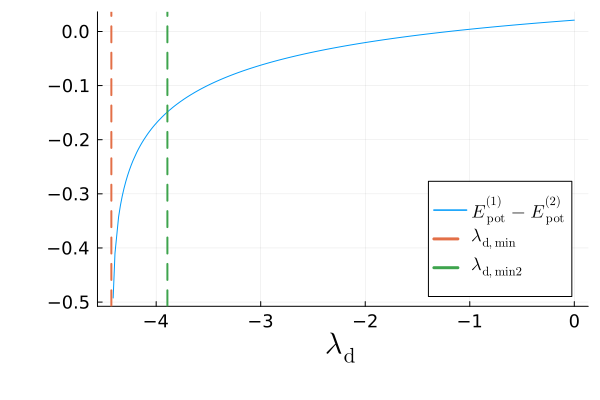

In [143]:
p1 = plot(xr_dm_01, fr_dm_01, xlabel=L"\lambda_\mathrm{d}", label=L"E^{(1)}_\mathrm{pot}- E^{(2)}_\mathrm{pot}", 
    xtickfontsize=12,ytickfontsize=12,xguidefontsize=20,yguidefontsize=20,legendfontsize=12,left_margin = 10mm, bottom_margin=10mm)
vline!([λdmin], lw=2, ls=:dash, label=L"\lambda_{\mathrm{d},\mathrm{min}}")
vline!([λdmin_new], lw=2, ls=:dash, label=L"\lambda_{\mathrm{d},\mathrm{min2}}")
savefig("lambda_min_cmp.pdf")
display(p1)

In [132]:
to

────────────────────────────────────────────────────────────────────────────
                                   Time                    Allocations      
                          ───────────────────────   ────────────────────────
    Tot / % measured:          1.32h /   0.8%            485GiB /   5.3%    

Section           ncalls     time    %tot     avg     alloc    %tot      avg
────────────────────────────────────────────────────────────────────────────
Bisection              3    10.7s   29.1%   3.58s   6.29GiB   24.6%  2.10GiB
AlefeldPotraShi        3    4.60s   12.4%   1.53s   3.43GiB   13.4%  1.14GiB
Ridders                3    4.15s   11.2%   1.38s   3.12GiB   12.2%  1.04GiB
A42                    3    4.09s   11.1%   1.36s   3.00GiB   11.7%  1.00GiB
Brent                  3    3.90s   10.6%   1.30s   2.88GiB   11.3%  0.96GiB
Chandrapatla           3    3.82s   10.3%   1.27s   2.87GiB   11.2%  0.96GiB
ITP                    3    3.50s    9.5%   1.17s   2.58GiB   10.1%   882Mi

In [52]:
reset_timer!(to)

────────────────────────────────────────────────────────────────────
                           Time                    Allocations      
                  ───────────────────────   ────────────────────────
Tot / % measured:     80.7μs /   0.0%              712B /   0.0%    

Section   ncalls     time    %tot     avg     alloc    %tot      avg
────────────────────────────────────────────────────────────────────
────────────────────────────────────────────────────────────────────

In [134]:
using OffsetArrays, TimerOutputs, FiniteDiff, LinearAlgebra
using ForwardDiff
using Roots
λ₀T = LadderDGA.λ₀T
eom_ν_cutoff = LadderDGA.eom_ν_cutoff
ω2_tail= LadderDGA.ω2_tail
iν_array = LadderDGA.iν_array
tail_factor = LadderDGA.tail_factor
tail_correction_term = LadderDGA.tail_correction_term
get_λ_min = LadderDGA.LambdaCorrection.get_λ_min
newton_right = LadderDGA.LambdaCorrection.newton_right
λm_rhs = LadderDGA.LambdaCorrection.λm_rhs
λm_correction_val = LadderDGA.LambdaCorrection.λm_correction_val
calc_G_Σ! = LadderDGA.calc_G_Σ!
to = LadderDGA.to
newton_secular = LadderDGA.LambdaCorrection.newton_secular

function newton_right_test(f::Function, start::Float64, min::Float64; nsteps::Int=100, atol::Float64=1e-8, δ::Float64=1e-4, verbose::Bool=true)::Float64
    df(x) = FiniteDiff.finite_difference_derivative(f, x, typeof(Val(:forward)), Float64)
    newton_right_test(f, df, start, min; nsteps = nsteps, atol = atol, δ = δ, verbose=verbose)
end

function newton_right_test(f::Function, df::Function, start::Float64, min::Float64; nsteps::Int = 500, atol::Float64=1e-8, δ::Float64=1e-4, verbose::Bool=true)::Float64
    done  = false
    xlast = start + δ
    xi    = xlast
    i     = 1
    while !done
        fi = f(xi)
        dfii = 1 / df(xi)
        xi = xlast - dfii * fi
        # Found solution in the correct interval
        (norm(fi) < atol) && (xi > min) && break
        # only ever search to the right! bisect instead
        if xi < min
            xi = norm(xlast - (min + δ))/2 +  (min + δ)
        else
            xlast = xi
        end
        (i >= nsteps) && (done = true)
        verbose && println("i = $i, xi = $xi, f(xi) = $fi")
        i += 1
    end
    println("nsteps = ", i-1)
    return xi
end

function λdm_correction_val_testTF(χm::χT,γm::γT,χd::χT, γd::γT,λ₀::λ₀T, h; 
                        νmax::Int = eom_ν_cutoff(h), fix_n::Bool = true,tc::Type{<: ΣTail} = default_Σ_tail_correction(),
                        use_trivial_λmin::Bool = (tc === ΣTail_EoM),  λd_min::Float64 = NaN, sigdigits::Int=9,
                        validation_threshold::Float64 = 1e-8, max_steps_m::Int = 2000, 
                        max_steps_dm::Int = 2000, log_io = devnull)::Tuple{Float64,Float64}
    ωn2_tail = ω2_tail(χm)
    Nq::Int = length(h.kG.kMult)
    
    Kνωq_pre::Vector{ComplexF64} = Vector{ComplexF64}(undef, Nq)
    Σ_ladder = OffsetArray(Matrix{ComplexF64}(undef, Nq, νmax), 1:Nq, 0:νmax-1)
    G_ladder = similar(Σ_ladder)
    iν = iν_array(h.mP.β, collect(axes(Σ_ladder, 2)))
    tc_factor = tail_factor(tc, h.mP.U, h.mP.β, h.mP.n, h.Σ_loc, iν) 

    λd_min::Float64 = if !isnan(λd_min)
        λd_min
    else
        if use_trivial_λmin 
            get_λ_min(χd)
        else
            get_λd_min(χm, γm, χd, γd, λ₀, h)
        end
    end

    cache = Dict{Float64,Float64}()
    sizehint!(cache, 4*max_steps_dm)
    NF = 0
    
    function f_c2(λd_i::Float64)
        NF += 1
        λd_i = round(λd_i,sigdigits=sigdigits)
        if λd_i in keys(cache)
            return cache[λd_i]
        else
            rhs_c1,_ = λm_rhs(χm, χd, h; λd=λd_i)
            λm_i   = λm_correction_val(χm, rhs_c1, h.kG, ωn2_tail; max_steps=max_steps_m, eps=validation_threshold)
            tc_term  = (tc === ΣTail_EoM) ? h.χ_m_loc : tail_correction_term(sum_kω(h.kG, χm, λ=λm_i), h.χloc_m_sum, tc_factor)
            μ_new = calc_G_Σ!(G_ladder, Σ_ladder, Kνωq_pre, tc_term, χm, γm, χd, γd, λ₀, λm_i, λd_i, h, fix_n=fix_n)
    
            #TODO: use Epot_1
            Ekin_1, Epot_1 = calc_E(G_ladder, Σ_ladder, μ_new, h.kG, h.mP)
            Epot_2 = EPot_p2(χm, χd, λm_i, λd_i, h.mP.n, h.mP.U, h.kG)
            cache[λd_i] = Epot_1 - Epot_2
        end
        return cache[λd_i]
    end
    λd  = newton_secular(f_c2, λd_min; nsteps=max_steps_dm, atol=validation_threshold)
    println("Method: Secular. Result = ", λd, " /// NF = $NF" )
    rhs,_ = λm_rhs(χm, χd, h; λd=λd)
    λm  = λm_correction_val(χm, rhs, h; max_steps=max_steps_m, eps=validation_threshold)
    return λm, λd
end

function λdm_correction_val_test(χm::χT,γm::γT,χd::χT, γd::γT,λ₀::λ₀T, h; 
                        νmax::Int = eom_ν_cutoff(h), fix_n::Bool = true,tc::Type{<: ΣTail} = default_Σ_tail_correction(),
                        use_trivial_λmin::Bool = (tc === ΣTail_EoM),  λd_min::Float64 = NaN, sigdigits::Int=9,
                        validation_threshold::Float64 = 1e-8, max_steps_m::Int = 2000, 
                        max_steps_dm::Int = 2000, log_io = devnull)::Tuple{Float64,Float64}
    ωn2_tail = ω2_tail(χm)
    Nq::Int = length(h.kG.kMult)
    
    Kνωq_pre::Vector{ComplexF64} = Vector{ComplexF64}(undef, Nq)
    Σ_ladder = OffsetArray(Matrix{ComplexF64}(undef, Nq, νmax), 1:Nq, 0:νmax-1)
    G_ladder = similar(Σ_ladder)
    iν = iν_array(h.mP.β, collect(axes(Σ_ladder, 2)))
    tc_factor = tail_factor(tc, h.mP.U, h.mP.β, h.mP.n, h.Σ_loc, iν) 

    λd_min::Float64 = if !isnan(λd_min)
        λd_min
    else
        if use_trivial_λmin 
            get_λ_min(χd)
        else
            get_λd_min(χm, γm, χd, γd, λ₀, h)
        end
    end
    
    cache = Dict{Float64,Float64}()
    sizehint!(cache, 4*max_steps_dm)
    NF = 0
    
    function f_c2(λd_i::Float64)
        NF += 1
        λd_i = round(λd_i,sigdigits=sigdigits)
        if λd_i in keys(cache)
            return cache[λd_i]
        else
            rhs_c1,_ = λm_rhs(χm, χd, h; λd=λd_i)
            λm_i   = λm_correction_val(χm, rhs_c1, h.kG, ωn2_tail; max_steps=max_steps_m, eps=validation_threshold)
            tc_term  = (tc === ΣTail_EoM) ? h.χ_m_loc : tail_correction_term(sum_kω(h.kG, χm, λ=λm_i), h.χloc_m_sum, tc_factor)
            μ_new = calc_G_Σ!(G_ladder, Σ_ladder, Kνωq_pre, tc_term, χm, γm, χd, γd, λ₀, λm_i, λd_i, h, fix_n=fix_n)
    
            #TODO: use Epot_1
            Ekin_1, Epot_1 = calc_E(G_ladder, Σ_ladder, μ_new, h.kG, h.mP)
            Epot_2 = EPot_p2(χm, χd, λm_i, λd_i, h.mP.n, h.mP.U, h.kG)
            cache[λd_i] = Epot_1 - Epot_2
        end
        return cache[λd_i]
    end
    λd  = newton_right_test(f_c2, λd_min+20.0, λd_min, verbose=false, nsteps=max_steps_dm, atol=validation_threshold, δ=1e-3)
    println("Method: Reset. Result = ", λd, " /// NF = $NF" )
    rhs,_ = λm_rhs(χm, χd, h; λd=λd)
    λm  = λm_correction_val(χm, rhs, h; max_steps=max_steps_m, eps=validation_threshold)
    return λm, λd
end

function λdm_correction_val_MethodTest(method, χm::χT,γm::γT,χd::χT, γd::γT,λ₀::λ₀T, h; 
                        νmax::Int = eom_ν_cutoff(h), fix_n::Bool = true,tc::Type{<: ΣTail} = default_Σ_tail_correction(),
                        use_trivial_λmin::Bool = (tc === ΣTail_EoM),  λd_min::Float64 = NaN, sigdigits::Int=9,
                        validation_threshold::Float64 = 1e-8, max_steps_m::Int = 2000, 
                        max_steps_dm::Int = 2000, log_io = devnull)::Tuple{Float64,Float64}
    ωn2_tail = ω2_tail(χm)
    Nq::Int = length(h.kG.kMult)
    
    Kνωq_pre::Vector{ComplexF64} = Vector{ComplexF64}(undef, Nq)
    Σ_ladder = OffsetArray(Matrix{ComplexF64}(undef, Nq, νmax), 1:Nq, 0:νmax-1)
    G_ladder = similar(Σ_ladder)
    iν = iν_array(h.mP.β, collect(axes(Σ_ladder, 2)))
    tc_factor = tail_factor(tc, h.mP.U, h.mP.β, h.mP.n, h.Σ_loc, iν) 

    λd_min::Float64 = if !isnan(λd_min)
        λd_min
    else
        if use_trivial_λmin 
            get_λ_min(χd)
        else
            get_λd_min(χm, γm, χd, γd, λ₀, h)
        end
    end

    cache = Dict{Float64,Float64}()
    sizehint!(cache, 4*max_steps_dm)
    NF = 0

    function f_c2(λd_i::Float64)
        NF += 1
        λd_i = round(λd_i,sigdigits=sigdigits)
        if λd_i in keys(cache)
            return cache[λd_i]
        else
            rhs_c1,_ = λm_rhs(χm, χd, h; λd=λd_i)
            λm_i   = λm_correction_val(χm, rhs_c1, h.kG, ωn2_tail; max_steps=max_steps_m, eps=validation_threshold)
            tc_term  = (tc === ΣTail_EoM) ? h.χ_m_loc : tail_correction_term(sum_kω(h.kG, χm, λ=λm_i), h.χloc_m_sum, tc_factor)
            μ_new = calc_G_Σ!(G_ladder, Σ_ladder, Kνωq_pre, tc_term, χm, γm, χd, γd, λ₀, λm_i, λd_i, h, fix_n=fix_n)
    
            #TODO: use Epot_1
            Ekin_1, Epot_1 = calc_E(G_ladder, Σ_ladder, μ_new, h.kG, h.mP)
            Epot_2 = EPot_p2(χm, χd, λm_i, λd_i, h.mP.n, h.mP.U, h.kG)
            cache[λd_i] = Epot_1 - Epot_2
        end
        return cache[λd_i]
    end
    println(f_c2(λd_min + 1e-4), " ::: ", f_c2(200.0))
    λd  = find_zero(f_c2, (λd_min + 1e-4,200.0), method; atol=validation_threshold, maxiters=max_steps_dm)
    println("Method: $method. Result = ", λd, " /// NF = $NF" )
    rhs,_ = λm_rhs(χm, χd, h; λd=λd)
    λm  = λm_correction_val(χm, rhs, h; max_steps=max_steps_m, eps=validation_threshold)
    return λm, λd
end


λdm_correction_val_MethodTest (generic function with 1 method)